# Global Stocks Resources

https://docs.google.com/spreadsheets/d/1fJyqPkmF43ugiLT-v2jc9yxnruyycMbZnIFa6apAijs/edit?gid=0#gid=0



# 一些import

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# 自动重新加载类
%load_ext autoreload
%autoreload 2
# class是关键字 切忌不能用来命名
from src.classes.technical_analysis import TechnicalAnalysis

In [ ]:
df_sushiro = yf.download(["3563.T"], period="1y", interval="1d")
df_sushiro.columns = ["Close","High","Low","Open","Volume"]
df_nintendo = yf.download(["7974.T"], period="1y", interval="1d")
df_nintendo.columns = ["Close","High","Low","Open","Volume"]

df_gumi = yf.download(["3903.T"], period="1y", interval="1d")
df_gumi.columns = ["Close","High","Low","Open","Volume"]
df_meta_planet = yf.download(["3350.T"], period="1y", interval="1d")
df_meta_planet.columns = ["Close","High","Low","Open","Volume"]

# 从yahoo finance上取得数据

## Nvdia only

In [ ]:
df2 = yf.download(["NVDA"],period="1y",interval="1d")

df2.columns = ["Close","High","Low","Open","Volume"]

display(df2)

## 观察一下任天堂几个指标

In [ ]:
df_nintendo = yf.download(["7974.T"], period="1y", interval="1d")

if not df_nintendo.empty:
    df_nintendo.columns = ["Close","High","Low","Open","Volume"]
    display(df_nintendo)
else:
    print("Could not download data for ticker 7974. Please check the ticker symbol and try again.")

# 数据趋势可视化


## Prepare data

In [ ]:
nvda_data = TechnicalAnalysis(df2)
nintendo_data=TechnicalAnalysis(df_nintendo)
nvda_close_prices = nvda_data.close_price
nintendo_close_prices = nintendo_data.close_price

nvda_latest_close = nvda_data.close_price.iloc[-1]
nintendo_latest_close = nintendo_data.close_price.iloc[-1]

print(f"Latest NVDA Close Price: {nvda_latest_close}")
print(f"Latest Nintendo Close Price: {nintendo_latest_close}")

## 移动平均线
一个无视近期波动计算一定时间窗口的指标<br />
实践上比较适合周期稳定、没突发事件的中长期波动<br />
如果中长期赶不上收盘股价趋势，说明形势变化太快了<br />


In [ ]:
# 移动平均线
nvda_data.plot_ma()
# help(nvda_data)

2025/8/8 笔者保守认为Nvida由于生成AI、代理AI的过热期待太大，以至于过去的长期主义和现在的群众情绪有了较大脱节。

这个指标的参照不太具备参考性了。

## Bollinger Bands(布林带指标)
**核心构成————三线通道**
1.   上轨 = 20日移动平均线 + 2倍标准差  
2.   中轨 = 20日简单移动平均线（SMA20）  
3.   下轨 = 20日移动平均线 - 2倍标准差

In [ ]:
nvda_data.plot_bollinger_bands()

**波动率温度计​​**
1.   ​通道扩张​​：上轨↑+下轨↓ → 波动率增大（趋势启动前兆，如2023年NVIDIA突破前带宽扩大35%）
2.   通道收缩​​：上下轨向中轨靠拢 → 波动率降至低位（蓄势待破信号，称“布林带挤牙膏”）

关注美股新闻、只要资金回流美国大力搞AI的话能涨；但涨幅考虑每股收益的前年比在递减、潜力有限了。

**实战上来看触及上轨的“超买”不一定、要看基本面做估值**。<br />
在意的时间点发生的事件(考虑让Agent搜索这些技术面上震荡的时间点新闻)：<br />
2025-1月：
1.   deepseek出世、舆论震荡美国AI发展信心、NVDA下跌更多是恐惧心理（他人“恐惧”我“贪婪”,机会来了）——观望和准备加仓是上策。<br />
2.   美国升级AI芯片出口限制​​：美国商务部颁布​​史上最严出口管制​​，将限制范围从中国扩展至全球，中国被列为“高风险国家”，英伟达H20芯片遭禁售，55亿美元市场面临损失

2025-3~2025-5：
1.   H20芯片遭禁与替代方案加速：美国4月无限期禁止H20对华出口，英伟达立即启动​​新款降级版芯片研发​​，计划7月交付中国客户，性能降级但保供策略明确
2.   英伟达8月紧急发文​​否认芯片存在后门​​，强调“绝不植入终止开关”，维护客户信任

2025/8:
1. 政府加大投资Nvdia以外的芯片公司、动摇股民引流到其他地方（便宜买的好机会）
2. 降息周期快来了（便宜买的好机会）
3. (8/22)H20暂停制造

## MACD
EMA（指数平滑移动平均线）为基础：近期价格权重更高，权重按指数衰减（如昨日EMA占86%，新数据占14%）。

所以更适合高频振荡的情境交易来参考。（比如利好/利空消息出现）

*   新品发布，比如2025/8/8 Nintendo自家IP马里奥新商品发售
*   领域内策略改革（触发了提前预估内在价值），比如今年下半年开始的加密货币周期——SBI, mizuho喝一壶。

这些感觉都能在未来反映到MA50、MA200等技术面上，拭目以待一下（Nintendo为例观察一下）




2025/8/8 实际验证了Nintendo利好消息出现的时候、移动平均线不太能很好地反映实时的趋势。
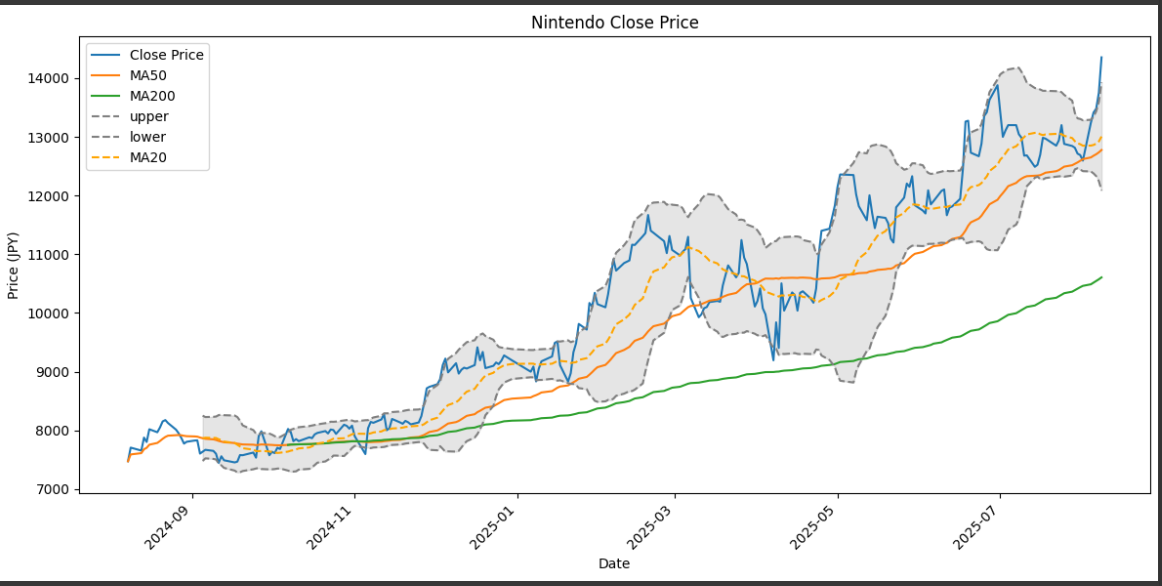

2025/8/12 看来这两天是按布林带技术指标回落了，布林带比较强的实时性啊（日均）。<br />
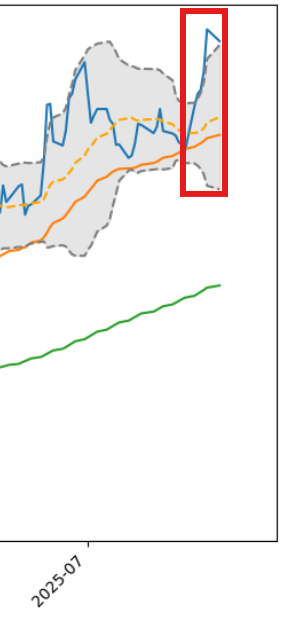

**换指数平均线(EMA)系列看看**


In [ ]:
nintendo_data.plot_macd()

# 关于Stock Market打点基础

1. 首先，它是个拍卖系统(action system)<br />
  分为一级市场(primary market)与二级市场(secondary market)
2. 其次，其成为上市公司流程：<br />
  IPO(Intial Public Offering) 首次公募 -> 发行新股 -> ... 因此吸引到公众投资
3. “我要把‘商品’放在哪家店”——股票交易所
***（今明天给出整理！）***
  就像美国的纳斯达克斯重视科技股票交易、Amex重视ETF交易
  日本TOPIX、NIKKEI分别是什么交易所？
  中国的上交所、深交所、港交所的重点又是啥？
4. "**Who**" am I? <br />
  我是investor？那我就是“持有”而不是“交易”。<br />
  我是trader？那我就是尽可能赚钱，源头就是“散户”、那就是复杂策略+博弈。<br />
5. "**Who**" are your opponents? <br />
  有时，并不是一切利好消息都能促进股票增长、比如最近我自己关注的一支股票(9722.T)。中期财报披露：
  [藤田観、今期経常を一転3％増益に上方修正・最高益更新へ
](https://kabutan.jp/news/?&b=k202508080433)<br />
  投资者视角：到了冬天这家公司就会因为温泉设施获得岁月静好的利润（再加上图表说明），我在游客访日数量大增的时候就坚持持有了。<br />
  交易员视角：机构在哪里？动向如何？夏天机构看多看空？<br />
  交易员目的：博弈、他人如何下手。<br />

  总的来说，都不建议这时候买入啊……

7. 啥叫**基本面分析(fundamental analysis)**？啥叫**技术分析(technical analysis)**?<br />
  2025/8/19 分析下Softbank Group(9984.T)的基本面

8. 一些数据
  **商品贸易帐**，也称为货物贸易帐，指的是一个国家在特定时期内商品出口总额与进口总额之间的差额。如果出口额大于进口额，则称为贸易顺差或出超；反之，如果进口额大于出口额，则称为贸易逆差或入超。

9. Trending
  本质就是“共识”、越多人用的工具越能巩固共识。<br />
  同样的，当一个技术指标用的人少、就不是“共识”、就失去了参考价值。([参考来源](https://www.udemy.com/course/foundation-course/learn/lecture/7618634?start=0#overview))

10. Whys does **Volume** matter?
  类比：一人出价买某地段房50万元vs.两万人买某地段同条件房花30万元，后者的价格“更可信”。<br />
  获得某种交易共识：当下基本面没有内在价值的突破不足以变动价格了。<br />
  这在价值投资中也有所参考。如果之后有回调等，就可以看情况慢慢买入。<br />

11. Risk management&Money management
  - daily trader视角：设置止损/止盈策略提高赚钱效率；投资者：期待长期回报、减少市场消息面的影响。<br />
  - Maximum risk per position should never exceed 5%.(if $10,000 account, the maximum loss should be lower than $500 at one trade, and 2% is ideal.)

12. Position Sizing










### 看一下Nvdia成交量

In [ ]:
nvda_data.plot_volume()

# 记录点个人心得

## 2025/8/19
在蜡烛图一课中学到的：https://www.udemy.com/course/foundation-course/learn/lecture/7550446?start=690#overview

不应该看太多指标 6~7个足够做预测了。<br />
实际上的蜡烛信号（看到多空交战造成的开盘、收盘焦灼），还得观察两天，到第三天继续涨、那么顺势买入；卖出同理。<br />

看到big candle 能明白多空势力势不可挡了，能立即顺势赚钱。<br />
サンリオ为例，等踏空的地方回调了。<br />
做空最好Day trading, 避免贪婪、记得恐惧。<br />

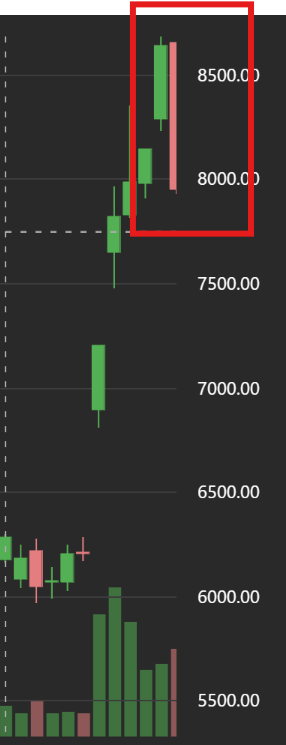